In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#está dando errado se tentar pegar as imagens do path images
files_path = [os.path.abspath(x) for x in os.listdir("./images/img400x_recorte_horizontal") if x.endswith('.png')]
print(files_path)

['/Users/wesleyaraujo/Documents/git/visaocomp/img400x_2.png', '/Users/wesleyaraujo/Documents/git/visaocomp/img400x_3.png', '/Users/wesleyaraujo/Documents/git/visaocomp/img400x_1.png']


img400x_2.png


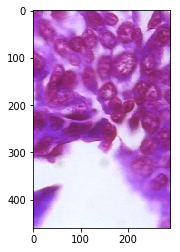

img400x_3.png


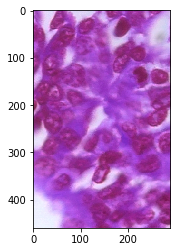

img400x_1.png


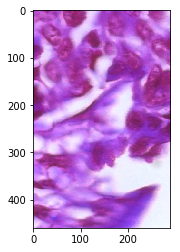

In [3]:
# diretorio, arquivo = path, filename = os.path.split(files_path[0])
# print(arquivo)
# img = cv2.imread(arquivo)
# plt.imshow(img)
# plt.show()
images = []
for i in files_path:
    diretorio, arquivo = path, filename = os.path.split(i)
    print(arquivo)
    img = cv2.imread(arquivo)
    images.append(img)
    plt.imshow(img)
    plt.show()
    


In [4]:
# Demora muito tempo para imagens menores que 400x
stitcher = cv2.createStitcher()
status, stitched = stitcher.stitch(images)
print(status)

0


# Algoritmo stitcher do opencv

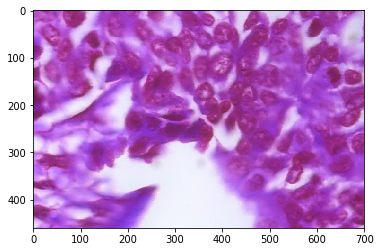

In [5]:
cv2.imwrite("output.png", stitched)
plt.imshow(stitched)
plt.show()

# ORB keypoints

In [7]:
# cv2.drawKeypoints está com erro em opencv 4.x, utilizar versão 3.4.5.20
a = []
kps1 = []
images = []
for i in files_path:
    diretorio, arquivo = path, filename = os.path.split(i)
    img = cv2.imread(arquivo)
    images.append(img)
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(img, None)
    a.append(descriptors)
    kps1.append(keypoints)
    print(type(keypoints[0]))
#     img2 = cv2.drawKeypoints(img, keypoints, None, color=(0,255,0), flags=0)
    a.append(descriptors)
    kps1.append(keypoints)
#     a.append(descriptors)
#     img = cv2.drawKeypoints(img, keypoints, None)
#     print(type(descriptors))
    
#     plt.imshow(img2)
#     plt.show()

<class 'cv2.KeyPoint'>
<class 'cv2.KeyPoint'>
<class 'cv2.KeyPoint'>


# Homography

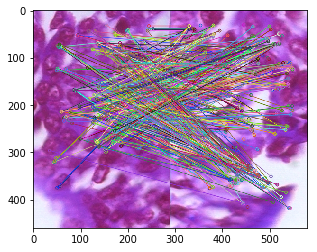

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/imgwarp.cpp:2926: error: (-215:Assertion failed) (M0.type() == 5 || M0.type() == 6) && M0.rows == 3 && M0.cols == 3 in function 'warpPerspective'


In [14]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(a[1], a[2])

matches.sort(key = lambda x:x.distance, reverse=False)

# qtdGoodMatches = int(len(matches) * 0.15)
# matches = matches[:qtdGoodMatches]
    
imMatches = cv2.drawMatches(images[1], kps1[1], images[2], kps1[2], matches, None)
plt.imshow(imMatches)
plt.show()

points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[1, :] = kps1[1][match.queryIdx].pt
    points2[1, :] = kps1[0][match.trainIdx].pt

h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
height, width, channels = images[1].shape
# print(h.size)
# if h.size != 0:
imgOutput = cv2.warpPerspective(images[0], h, (width, height))

        
# images[1].shape


plt.imshow(imgOutput)
plt.show()

# print(type(mask))
#     print(type(match))
#     print(type(kps[0][match.queryIdx]))
#     points1 = kps1[match.queryIdx]

# bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# matches = bf.match(a[0],a[1])

# matches = sorted(matches, key = lambda x:x.distance)

# img3 = cv2.drawMatches(images[0],kps1[0],images[1],kps1[1], matches, None)
# plt.imshow(img3)
# plt.show()


# SURF

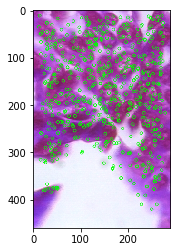

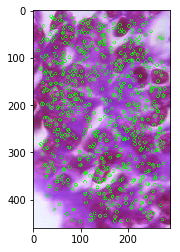

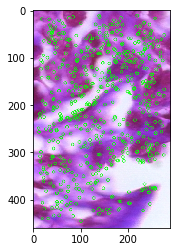

In [18]:
for i in images:
    surf = cv2.xfeatures2d.SURF_create()
    keypoints, descriptors = surf.detectAndCompute(i, None)
    img2 = cv2.drawKeypoints(i, keypoints, None, color=(0,255,0), flags=0)
    plt.imshow(img2)
    plt.show()

# SIFT

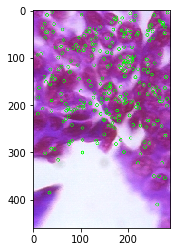

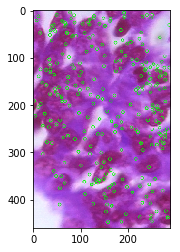

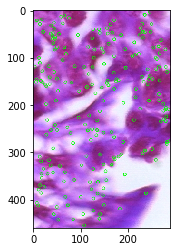

In [20]:
for i in images:
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(i, None)
    img2 = cv2.drawKeypoints(i, keypoints, None, color=(0,255,0), flags=0)
    plt.imshow(img2)
    plt.show()